In [1]:
%%bash
ls trainPart1

train


In [2]:
import numpy as np

float32
(900, 1200, 3)


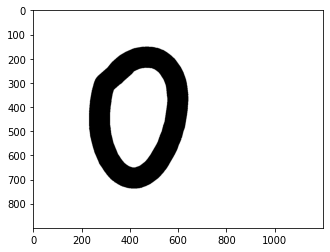

In [3]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('trainPart1/train/Sample001/img001-001.png')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [4]:
data.shape

(900, 1200, 3)

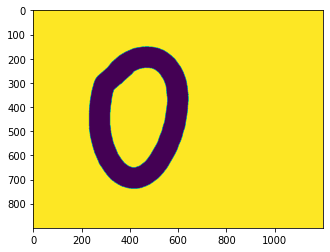

In [5]:
pyplot.imshow(data[:,:,0])

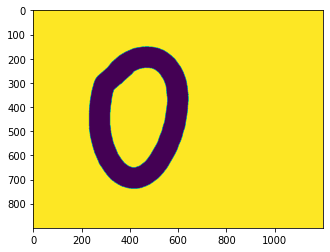

In [6]:
pyplot.imshow(data[:,:,1])

In [7]:
data.shape[0]

900

In [8]:
new_data=data[:,:,0]+data[:,:,1]+data[:,:,2]
new_data=new_data/3


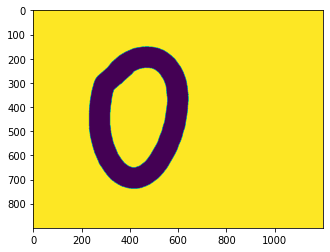

In [9]:
pyplot.imshow(new_data)

In [10]:
count=0
for i in new_data:
    for j in i:
        count+=j

In [11]:
dim=new_data.shape[0]*new_data.shape[1]

In [12]:
count/dim

0.8940333333333333

In [13]:
new_data[700,400]

0.0

In [14]:
def travel_to_point(data,
                    coordinate_1,
                    coordinate_2,
                    point_is_visited,
                    bound):
    if data[coordinate_1,coordinate_2]==0.0 and point_is_visited[coordinate_1][coordinate_2]==0:
        bound['left']=min(coordinate_2,bound['left'])
        bound['right']=max(coordinate_2,bound['right'])
        bound['up']=min(coordinate_2,bound['up'])
        bound['down']=max(coordinate_2,bound['down'])
        return get_fine_bounds(data,coordinate_1,coordinate_2,point_is_visited,bound)

In [21]:
def get_fine_bounds(data,
                    coordinate_1,
                    coordinate_2,
                    point_is_visited = [[0 for i in range(data.shape[1])] for j in range(data.shape[0])],
                    bound={'left':0,'right':2000,'up':0,'down':1000}):
    print("Hit. " + str(coordinate_1) +","+ str(coordinate_2))
#Given a point, look for other neighbouring points.
    point_is_visited[coordinate_1][coordinate_2]=1
    travel_to_point(data,coordinate_1+1, coordinate_2, point_is_visited, bound)
    travel_to_point(data,coordinate_1-1, coordinate_2, point_is_visited, bound)
    travel_to_point(data,coordinate_1, coordinate_2+1, point_is_visited, bound)
    travel_to_point(data,coordinate_1, coordinate_2-1, point_is_visited, bound)
    return bound

In [22]:
def get_bounds(data):
    padding=int((data.shape[1]-data.shape[0])/2)

    #Search starting from point (padding,0) diagonally upwards.
    for i in range(padding+10,padding+data.shape[0]-10):
        if data[padding+i,i]==0.0:
            return get_fine_bounds(data,padding+i,i)
  
  #Search starting from point (padding,data.shape[0]) diagonally downwards.
    for i in range(padding+10,padding+data.shape[0]-10):
        if data[padding+i,data.shape[0]-i]==0.0:
            return get_fine_bounds(data,padding+i,data.shape[0]-i)
  
  #Search along the line that divides the picture into two halves horizontally.
    for i in range(padding+10,padding+data.shape[0]-10):
        if data[data.shape[0]/2,i]==0.0:
            return get_fine_bounds(data,data.shape[0]/2,i)
  
  #Search along the line that divides the picture into two halves vertically.
    for i in range(padding+10,padding+data.shape[0]-10):
        if data[i,data.shape[1]/2]==0.0:
            return get_fine_bounds(data,i,data.shape[1]/2)

  #finally, fall back to the naive method.
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[i,j]==0.0:
                return get_fine_bounds(data,i,j)

In [23]:
result=get_bounds(new_data)

Hit. 385,235
Hit. 386,235
Hit. 387,235
Hit. 388,235
Hit. 389,235
Hit. 390,235
Hit. 391,235
Hit. 392,235
Hit. 393,235
Hit. 394,235
Hit. 395,235
Hit. 396,235
Hit. 397,235
Hit. 398,235
Hit. 399,235
Hit. 400,235
Hit. 401,235
Hit. 402,235
Hit. 403,235
Hit. 404,235
Hit. 405,235
Hit. 406,235
Hit. 407,235
Hit. 408,235
Hit. 409,235
Hit. 410,235
Hit. 411,235
Hit. 412,235
Hit. 413,235
Hit. 414,235
Hit. 415,235
Hit. 416,235
Hit. 417,235
Hit. 418,235
Hit. 419,235
Hit. 420,235
Hit. 421,235
Hit. 422,235
Hit. 423,235
Hit. 424,235
Hit. 425,235
Hit. 426,235
Hit. 427,235
Hit. 428,235
Hit. 429,235
Hit. 430,235
Hit. 431,235
Hit. 432,235
Hit. 433,235
Hit. 434,235
Hit. 435,235
Hit. 436,235
Hit. 437,235
Hit. 438,235
Hit. 439,235
Hit. 440,235
Hit. 441,235
Hit. 442,235
Hit. 443,235
Hit. 444,235
Hit. 445,235
Hit. 446,235
Hit. 447,235
Hit. 448,235
Hit. 449,235
Hit. 450,235
Hit. 451,235
Hit. 452,235
Hit. 453,235
Hit. 454,235
Hit. 455,235
Hit. 456,235
Hit. 457,235
Hit. 458,235
Hit. 459,235
Hit. 460,235
Hit. 461,235

RecursionError: maximum recursion depth exceeded while calling a Python object

In [29]:
print(result)

None
